### 1

### Introduction

This report contains information from Yelp which is an online portal where users can put reviews for many kinds of business organizations. Reviews are categorized based on star marks 1 to 5.
1 or 2 stars is considered as negative and 4 or 5 is positive as well as 3 is neutral. This report will demonstrate the best business which has a maximum positive impression and business value. 

In addition, this report will find business chrematistics based on data visualizations and statistics. Every visualization will have a proper interpretation so that the real concept can be cleared.


### 2

In [123]:
#import pandas numpy seaborn and os
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [124]:
#loading working directory
workingDirectory = os.getcwd()   
#loading csv dataset using pandas
data = pd.read_csv(workingDirectory + "/desktop/Projects/UniSa/ProgrammingFOrData/Practice/yelp_reviews.csv") 

In [127]:
#testing whether the dataset is loading correctly
data[0:5]

,user_id,business_id,date,stars,review_length,votes_funny,votes_useful,votes_cool,votes_total,pos_words,neg_words,net_sentiment
0,Xqd0DzHaiyRqVH3WRG7hzg,vcNAWiLM4dR7D2nwwJ7nCA,2007-05-17,5,94,0,2,1,3,4,1,3
1,H1kH6QZV7Le4zqTRNxoZow,vcNAWiLM4dR7D2nwwJ7nCA,2010-03-22,2,114,0,2,0,2,3,7,-4
2,zvJCcrpm2yOZrxKffwGQLA,vcNAWiLM4dR7D2nwwJ7nCA,2012-02-14,4,55,0,1,1,2,6,0,6
3,KBLW4wJA_fwoWmMhiHRVOA,vcNAWiLM4dR7D2nwwJ7nCA,2012-03-02,4,97,0,0,0,0,3,0,3
4,zvJCcrpm2yOZrxKffwGQLA,vcNAWiLM4dR7D2nwwJ7nCA,2012-05-15,4,53,0,2,1,3,1,2,-1


In [107]:
#printing basic information
print(data.shape)
print(data.user_id.nunique())
print(data.business_id.nunique())
print(data.date.min())
print(data.date.max())

(1569264, 12)
366715
60785
2004-10-12
2015-01-08


This dataset has 1569264 rows and 12 columns. It has been covered from 12/10/2004 to 08/01/2015 and has 366715 unique respondents. In addition, it has information for 60785 businesses.

### 3

In [108]:
#creating dataframe for stars, review_length, pos_words, neg_words and net_sentiment
stat_summary_data = data.drop(['user_id','business_id','date','votes_funny',
                   'votes_useful','votes_cool','votes_total'], axis=1)

In [109]:
#testing whether the dataset is loading correctly
stat_summary_data[0:2]

,stars,review_length,pos_words,neg_words,net_sentiment
0,5,94,4,1,3
1,2,114,3,7,-4


In [110]:
#Generate statistical summary of dataframe with readable float value
pd.options.display.float_format = '{:,.3f}'.format
stat_summary_data.describe()

,stars,review_length,pos_words,neg_words,net_sentiment
count,"1,569,264.000","1,569,264.000","1,569,264.000","1,569,264.000","1,569,264.000"
mean,3.743,125.601,7.072,2.550,4.522
std,1.311,115.498,5.927,3.250,5.240
min,1.000,0.000,0.000,0.000,-59.000
25%,3.000,48.000,3.000,0.000,1.000
50%,4.000,92.000,6.000,2.000,4.000
75%,5.000,165.000,9.000,4.000,7.000
max,5.000,"1,047.000",94.000,65.000,80.000


From the above statistical summary, we have found that it has 1,569,264 values and the mean of stars is 3.74 and the median is 4.0. As stars are categorical data so we should consider median as average value. Therefore average of stars is 4.0. On the other hand, review_length is a numerical variable so in that case we should consider mean as average value but the difference between mean and median is large so we should consider median as average. so the average of review_length is 92.0. In this way, the average of pos_words, neg_words, net_sentiment are 7.0, 2.5 and 4.5 respectively.

### 4

In [111]:
#creating dataframe for pos_words, neg_words and net_sentiment
table_graph_data = data.drop(['user_id','business_id','date','stars','review_length','votes_funny',
                   'votes_useful','votes_cool','votes_total'], axis=1)

In [112]:
#testing whether the table is loading correctly
table_graph_data[0:2]


,pos_words,neg_words,net_sentiment
0,4,1,3
1,3,7,-4


In [113]:
#Generate statistical summary of table
table_graph_data.describe()

,pos_words,neg_words,net_sentiment
count,"1,569,264.000","1,569,264.000","1,569,264.000"
mean,7.072,2.550,4.522
std,5.927,3.250,5.240
min,0.000,0.000,-59.000
25%,3.000,0.000,1.000
50%,6.000,2.000,4.000
75%,9.000,4.000,7.000
max,94.000,65.000,80.000


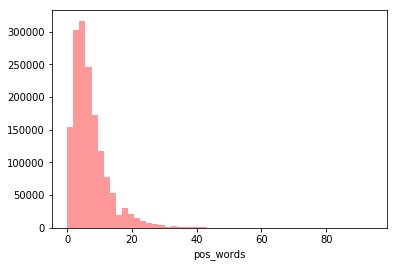

In [32]:
#creating histogram for pos_words
sns.distplot(table_graph_data['pos_words'], kde=False, color='red', bins=50)

In [33]:
#maximum number of pos_words
table_graph_data.pos_words.max()

94

Graph has too long tails so for better visualisation we should consider truncating

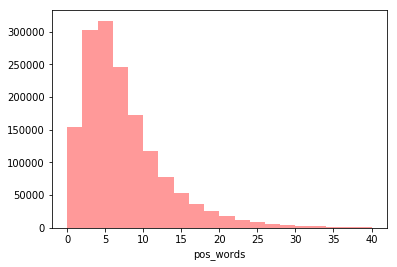

In [45]:
#for truncating we will filter only less than or equal to 40 data
temp_posWord = table_graph_data['pos_words']
temp_posWord = temp_posWord[temp_posWord <= 40]
#creating histogram for filterd pos_words
sns.distplot(temp_posWord, kde=False, color='red', bins=20)

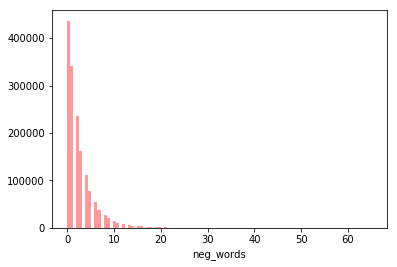

In [37]:
#creating histogram for neg_words
sns.distplot(table_graph_data['neg_words'], kde=False, color='red', bins=100)

In [46]:
#maximum number of neg_words
table_graph_data.neg_words.max()

65

Graph has too long tails so for better visualisation we should consider truncating

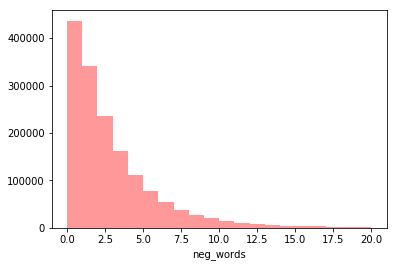

In [47]:
#for truncating we will filter only less than or equal to 20 data
temp_negWord = table_graph_data['neg_words']
temp_negWord = temp_negWord[temp_negWord <= 20]
#creating histogram for filterd neg_words
sns.distplot(temp_negWord, kde=False, color='red', bins=20)

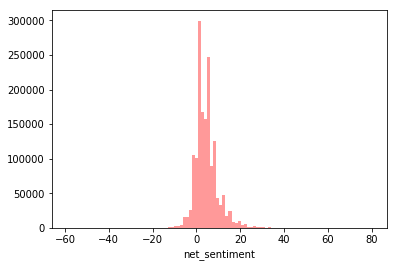

In [48]:
#creating histogram for net_sentiment
sns.distplot(table_graph_data['net_sentiment'], kde=False, color='red', bins=100)

In [50]:
#maximum & minimum number of net_sentiment
print(table_graph_data.net_sentiment.min())
print(table_graph_data.net_sentiment.max())

-59
80


Graph has too long tails so for better visualisation we should consider truncating

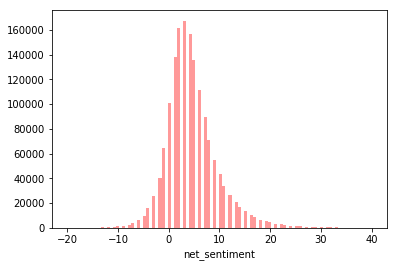

In [52]:
#for truncating we will filter only greater than or equal to -20 & less then or equal to 40 data
temp_netSentiment = table_graph_data['net_sentiment']
temp_netSentiment = temp_netSentiment[(temp_netSentiment >= -20) & (temp_netSentiment <= 40)]
#creating histogram for filterd net_sentiment
sns.distplot(temp_netSentiment, kde=False, color='red', bins=100)

Both histograms of pos_words and neg_words are right skewed and the distribution is asymtrical. So the average of pos_words and neg_words will be medians in that case 6 and 2 respectively. From the observation we can see that most of values of pos_words are in between 0 and 10 whereas most of values of neg_words are in between 0 and 5. On the other hand, histogram of net_sentiment is almost symetrical so the avarge of net_sentiment will be mean value which is 4.522. Therefore we can say that the tendency of using positive word is higher then the negative words in review.

### 5

In [114]:
#creating dataframe for stars and review length
reviewLengthStar_data = data.drop(['user_id','business_id','date','votes_funny',
                   'votes_useful','votes_cool','votes_total','pos_words',
                   'neg_words','net_sentiment'], axis=1)

   stars  review_length
0      5             94
1      2            114


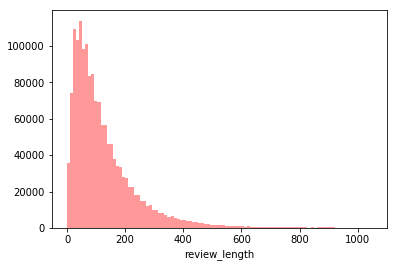

In [115]:
#testing whether the table is loading correctly and checking the distribution of review_length
print(reviewLengthStar_data[0:2])
sns.distplot(reviewLengthStar_data['review_length'], kde=False, color='red', bins=100)

In [116]:
#groupby using stars
reviewLengthStar_data.groupby('stars').groups

{1: Int64Index([      5,       8,      15,      16,      44,      45,      46,
                  48,      53,     116,
             ...
             1569171, 1569172, 1569185, 1569200, 1569202, 1569215, 1569237,
             1569257, 1569259, 1569262],
            dtype='int64', length=159811),
 2: Int64Index([      1,      12,      20,      40,      54,      59,      63,
                  65,     107,     118,
             ...
             1569127, 1569129, 1569154, 1569156, 1569163, 1569168, 1569205,
             1569231, 1569236, 1569242],
            dtype='int64', length=140608),
 3: Int64Index([     11,      14,      35,      38,      43,      56,      57,
                  64,      70,      84,
             ...
             1569159, 1569170, 1569180, 1569188, 1569191, 1569199, 1569201,
             1569209, 1569212, 1569263],
            dtype='int64', length=222719),
 4: Int64Index([      2,       3,       4,      13,      17,      18,      21,
                  25,      28,   

In [117]:
#groupby and aggregating with mean standard deviation median quantile 1 and quantile 3
def q1(x):
    return x.quantile(0.25)

def q2(x):
    return x.quantile(0.75)
temp_data = reviewLengthStar_data.groupby('stars').agg(['mean','std','median',q1,q2])


In [118]:
#showing the table
temp_data

review_length                        
               mean     std median  q1   q2
stars                                      
1           152.715 142.865    109  57  198
2           153.984 131.189    117  64  202
3           140.594 118.417    109  59  185
4           125.037 109.375     95  50  166
5           105.930 102.104     75  40  137

Text(0, 0.5, 'Average')

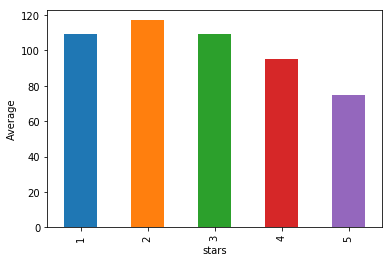

In [77]:
#plotting median value of review_length per star category
ax = temp_data['review_length']['median'].plot(kind = 'bar')
ax.set_ylabel('Average')

In [92]:
# average review length of negative reviews and positive reviews
negative_reviews_avarage_length = (temp_data['review_length']['median'].iloc[0] + 
                                    temp_data['review_length']['median'].iloc[1])/2
positive_reviews_avarage_length = (temp_data['review_length']['median'].iloc[3] + 
                                    temp_data['review_length']['median'].iloc[4])/2
print(negative_reviews_avarage_length)
print(positive_reviews_avarage_length)

113.0
85.0


From the observations, we have seen that the distribution of review_length is extremely right skewed and asymmetrical so we should consider median as average value. On the other hand, average review length of negative review is higher than the positive reviews. Therefore, users prefer writing big reviews for negative impressions rather than positive impressions.

### 6

In [94]:
#creating dataframe for business_id, stars, review_length, pos_words, neg_words, net_sentiment
BestBusiness_data = data.drop(['user_id','date','votes_funny',
                   'votes_useful','votes_cool','votes_total'], axis=1)

In [95]:
#testing whether the table is loading correctly
BestBusiness_data[0:2]

,business_id,stars,review_length,pos_words,neg_words,net_sentiment
0,vcNAWiLM4dR7D2nwwJ7nCA,5,94,4,1,3
1,vcNAWiLM4dR7D2nwwJ7nCA,2,114,3,7,-4


In [119]:
#group by using business_id
temp_BestBusiness_data = BestBusiness_data.groupby(['business_id'])
#count the row to count maximum stars
counts_data = temp_BestBusiness_data.size().to_frame(name='counts')
#getting maximum number of stars
print(counts_data.max())
temp_all_data = (counts_data.join(temp_BestBusiness_data.agg({'stars': 'mean'}).rename(columns={'stars': 'stars_mean'}))
.join(temp_BestBusiness_data.agg({'stars': 'median'}).rename(columns={'stars': 'stars_median'}))
.join(temp_BestBusiness_data.agg({'review_length': 'mean'}).rename(columns={'review_length': 'review_length_mean'}))
.join(temp_BestBusiness_data.agg({'review_length': 'median'}).rename(columns={'review_length': 'review_length_median'}))
.join(temp_BestBusiness_data.agg({'pos_words': 'median'}).rename(columns={'pos_words': 'pos_words_median'}))
.join(temp_BestBusiness_data.agg({'neg_words': 'median'}).rename(columns={'neg_words': 'neg_words_median'}))
.join(temp_BestBusiness_data.agg({'net_sentiment': 'mean'}).rename(columns={'net_sentiment': 'net_sentiment_mean'}))
.reset_index()
)
 

counts    4137
dtype: int64


In [120]:
# sort data based on row counts
sorted_data = temp_all_data.sort_values('counts',ascending=False)

In [121]:
# showing data with maximum values
sorted_data[0:10]

,business_id,counts,stars_mean,stars_median,review_length_mean,review_length_median,pos_words_median,neg_words_median,net_sentiment_mean
5417,4bEjOyTaDG24SY5TxsaUNQ,4137,4.140,4.000,125.275,96.000,7.000,1.000,6.337
3554,2e2e7WgqU1BnpxmQL5jbfw,3517,4.306,5.000,98.495,81.000,5.000,1.000,4.156
60706,zt1TpTuJ6y9n551sw9TaEg,3352,3.750,4.000,148.947,115.000,7.000,3.000,4.966
33174,Xhg93cMdemu5pAMkDoEdtQ,2675,3.084,3.000,130.924,104.000,6.000,3.000,3.571
53623,sIyHTizqAiGu12XMLX3N3g,2657,3.877,4.000,183.342,140.000,7.000,2.000,6.026
33796,YNQgak-ZLtYJQxlDwN-qIg,2619,3.722,4.000,143.533,116.000,7.000,2.000,5.236
54483,tFU2Js_nbIZOrnKfYJYBBg,2337,3.998,4.000,166.990,129.000,8.000,2.000,6.958
36507,aGbjLWzcrnEx2ZmMCFm3EA,2269,3.869,4.000,155.506,114.000,7.000,2.000,5.910
13008,CZjcFdvJhksq9dy58NVEzw,2252,3.593,4.000,128.049,103.000,6.000,2.000,4.121
11453,AtjsjFzalWqJ7S9DUFQ4bw,2241,3.950,4.000,185.927,134.000,8.000,2.000,6.537


From the above table we are seeing that maximum number of reviews are in top 2 or 3 businesses which are 4137, 3517, 3352 respectively where average stars are 4 or 5. 4 and 5 both are positive reviews and relatively good average review lengths are 96, 81 and 115 respectivelyBut the third one has higher negative review than first two rows. so from my opinion top 2 have the best business modelscause they have stars 4 or 5 and good review length and in reviewhigher positive words than negative words. Therefor, the best businesses are with business id's '4bEjOyTaDG24SY5TxsaUNQ' and '2e2e7WgqU1BnpxmQL5jbfw'.